## The following code was utlized to explore the data exported directly from the Environmental Protection Agency's Air Quality System.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import shapiro


### PM10 Daily Mean Concentrations

#### 2018

In [2]:
PM10_2018 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2018.csv")
PM10_2019 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2019.csv")
PM10_2020 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2020.csv")
PM10_2021 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2021.csv")
PM10_2022 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2022.csv")
PM10_2023 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2023.csv")
PM10_2024 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM10/PM10_2024.csv")

In [3]:
PM10_2018.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM10 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [4]:
PM10_2018

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/02/2018,AQS,60650003,1,100,ug/m3 SC,73,Norco,1,100.0,...,PM10 Total 0-10um STP,63,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.92145,-117.57244
1,01/08/2018,AQS,60650003,1,30,ug/m3 SC,28,Norco,1,100.0,...,PM10 Total 0-10um STP,63,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.92145,-117.57244
2,01/14/2018,AQS,60650003,1,12,ug/m3 SC,11,Norco,1,100.0,...,PM10 Total 0-10um STP,63,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.92145,-117.57244
3,01/20/2018,AQS,60650003,1,12,ug/m3 SC,11,Norco,1,100.0,...,PM10 Total 0-10um STP,63,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.92145,-117.57244
4,01/26/2018,AQS,60650003,1,26,ug/m3 SC,24,Norco,1,100.0,...,PM10 Total 0-10um STP,63,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.92145,-117.57244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,12/27/2018,AQS,60659001,3,14,ug/m3 SC,13,Lake Elsinore,1,100.0,...,PM10 Total 0-10um STP,79,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.67649,-117.33098
2906,12/28/2018,AQS,60659001,3,45,ug/m3 SC,42,Lake Elsinore,1,100.0,...,PM10 Total 0-10um STP,79,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.67649,-117.33098
2907,12/29/2018,AQS,60659001,3,11,ug/m3 SC,10,Lake Elsinore,1,100.0,...,PM10 Total 0-10um STP,79,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.67649,-117.33098
2908,12/30/2018,AQS,60659001,3,13,ug/m3 SC,12,Lake Elsinore,1,100.0,...,PM10 Total 0-10um STP,79,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.67649,-117.33098


In [5]:
PM10_2018_data = PM10_2018[['Date', 'Daily Mean PM10 Concentration']]
PM10_2018_data

,Date,Daily Mean PM10 Concentration
0,01/02/2018,100
1,01/08/2018,30
2,01/14/2018,12
3,01/20/2018,12
4,01/26/2018,26
...,...,...
2905,12/27/2018,14
2906,12/28/2018,45
2907,12/29/2018,11
2908,12/30/2018,13


In [6]:
PM10_2018_data_grouped = PM10_2018_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [7]:
Concentration_2018 = PM10_2018_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2018_data_grouped['Date'])

In [8]:
PM10_2018_data_grouped

,Date,Daily Mean PM10 Concentration
0,01/01/2018,52.000000
1,01/02/2018,55.058824
2,01/03/2018,55.000000
3,01/04/2018,43.000000
4,01/05/2018,46.777778
...,...,...
360,12/27/2018,21.333333
361,12/28/2018,24.466667
362,12/29/2018,17.000000
363,12/30/2018,19.833333


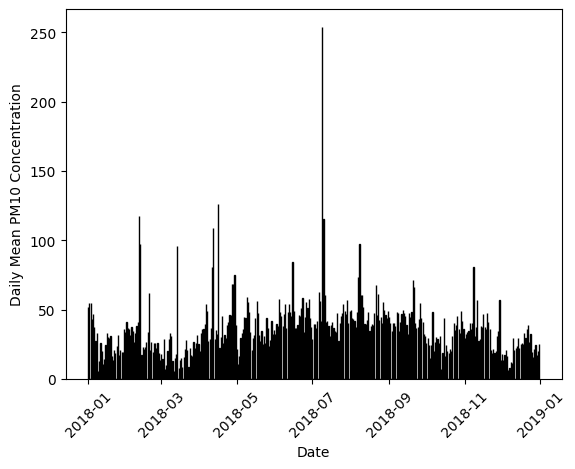

In [9]:
plt.hist(Date, weights=Concentration_2018, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

In [10]:
stat, p = shapiro(Concentration_2018)

if p > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not normally distributed.")

Data is not normally distributed.


#### 2019

In [11]:
PM10_2019_data = PM10_2019[['Date', 'Daily Mean PM10 Concentration']]
PM10_2019_data

,Date,Daily Mean PM10 Concentration
0,01/03/2019,27
1,01/09/2019,30
2,01/15/2019,9
3,01/21/2019,10
4,02/26/2019,27
...,...,...
3152,12/27/2019,7
3153,12/28/2019,11
3154,12/29/2019,8
3155,12/30/2019,7


In [12]:
PM10_2019_data_grouped = PM10_2019_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [13]:
Concentration_2019 = PM10_2019_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2019_data_grouped['Date'])

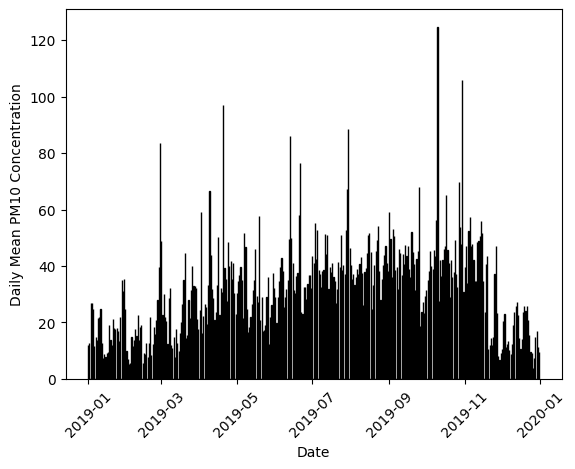

In [14]:
plt.hist(Date, weights=Concentration_2019, bins=3157, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2020

In [15]:
PM10_2020_data = PM10_2020[['Date', 'Daily Mean PM10 Concentration']]
PM10_2020_data

,Date,Daily Mean PM10 Concentration
0,01/04/2020,38
1,01/10/2020,23
2,01/16/2020,39
3,01/22/2020,22
4,01/28/2020,24
...,...,...
3045,12/27/2020,15
3046,12/28/2020,2
3047,12/29/2020,4
3048,12/30/2020,9


In [16]:
PM10_2020_data_grouped = PM10_2020_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [17]:
Concentration_2020 = PM10_2020_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2020_data_grouped['Date'])

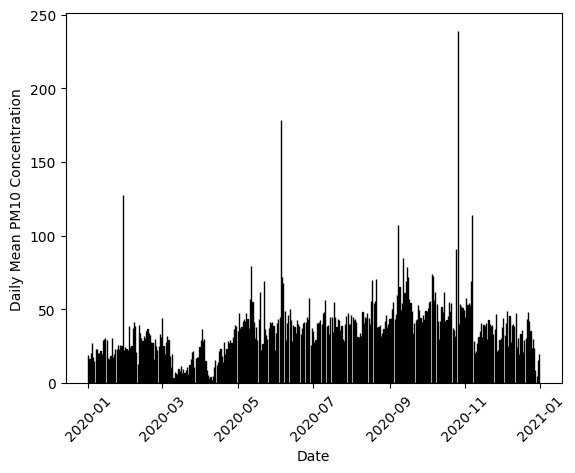

In [18]:
plt.hist(Date, weights=Concentration_2020, bins=3050, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2021

In [19]:
PM10_2021_data = PM10_2021[['Date', 'Daily Mean PM10 Concentration']]
PM10_2021_data

,Date,Daily Mean PM10 Concentration
0,01/04/2021,34
1,01/10/2021,19
2,01/16/2021,34
3,01/22/2021,25
4,01/28/2021,15
...,...,...
3305,12/27/2021,5
3306,12/28/2021,4
3307,12/29/2021,3
3308,12/30/2021,2


In [20]:
PM10_2021_data_grouped = PM10_2021_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [21]:
Concentration_2021 = PM10_2021_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2021_data_grouped['Date'])

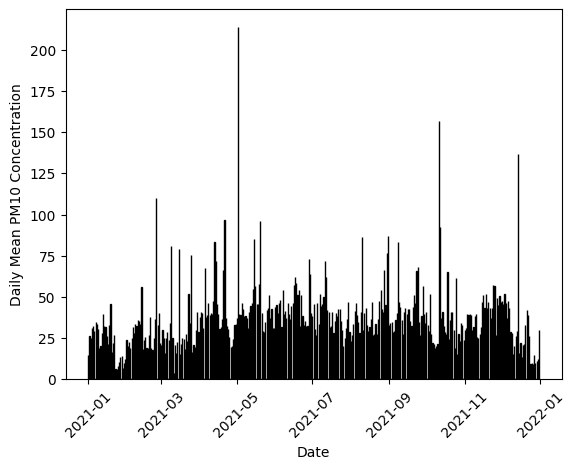

In [22]:
plt.hist(Date, weights=Concentration_2021, bins=3310, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2022

In [23]:
PM10_2022_data = PM10_2022[['Date', 'Daily Mean PM10 Concentration']]
PM10_2022_data

,Date,Daily Mean PM10 Concentration
0,01/05/2022,20
1,01/11/2022,14
2,01/17/2022,10
3,01/23/2022,8
4,01/29/2022,8
...,...,...
2982,12/27/2022,19
2983,12/28/2022,3
2984,12/29/2022,9
2985,12/30/2022,2


In [24]:
PM10_2022_data_grouped = PM10_2022_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [25]:
Concentration_2022 = PM10_2022_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2022_data_grouped['Date'])

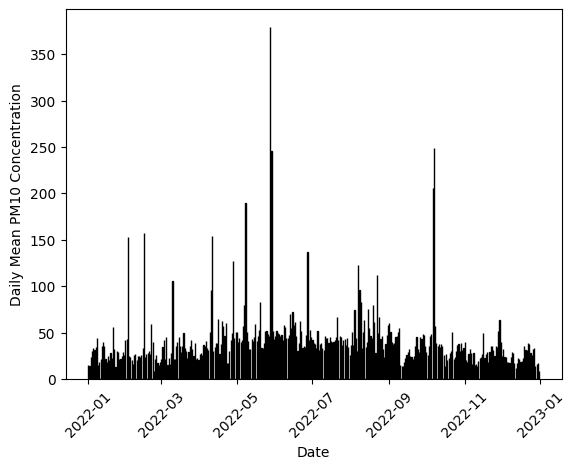

In [26]:
plt.hist(Date, weights=Concentration_2022, bins=2987, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2023

In [27]:
PM10_2023_data = PM10_2023[['Date', 'Daily Mean PM10 Concentration']]
PM10_2023_data

,Date,Daily Mean PM10 Concentration
0,01/06/2023,5
1,01/12/2023,2
2,01/18/2023,9
3,01/24/2023,11
4,01/30/2023,3
...,...,...
2408,12/27/2023,30
2409,12/28/2023,32
2410,12/29/2023,23
2411,12/30/2023,17


In [28]:
PM10_2023_data_grouped = PM10_2023_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [29]:
Concentration_2023 = PM10_2023_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2023_data_grouped['Date'])

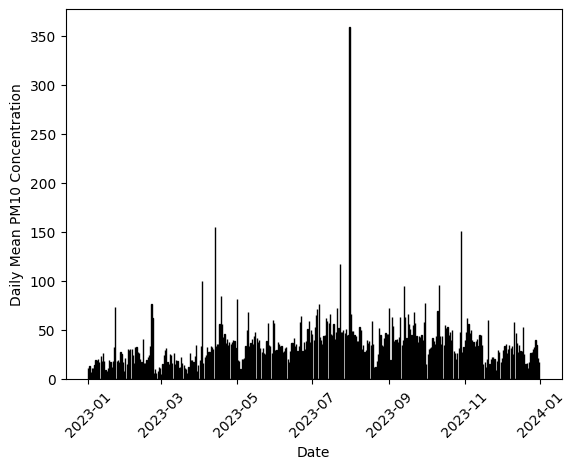

In [30]:
plt.hist(Date, weights=Concentration_2023, bins=2413, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2024

In [31]:
PM10_2024_data = PM10_2024[['Date', 'Daily Mean PM10 Concentration']]
PM10_2024_data

,Date,Daily Mean PM10 Concentration
0,01/01/2024,6
1,01/07/2024,5
2,01/13/2024,17
3,01/19/2024,13
4,01/25/2024,8
...,...,...
2573,12/27/2024,34
2574,12/28/2024,37
2575,12/29/2024,38
2576,12/30/2024,37


In [32]:
PM10_2024_data_grouped = PM10_2024_data.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [33]:
Concentration_2024 = PM10_2024_data_grouped['Daily Mean PM10 Concentration']
Date = pd.to_datetime(PM10_2024_data_grouped['Date'])

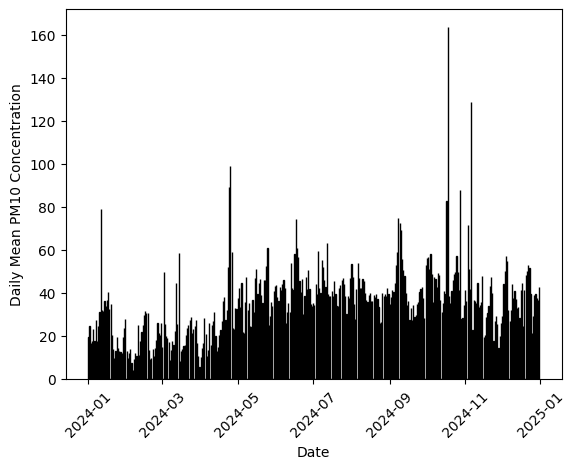

In [34]:
plt.hist(Date, weights=Concentration_2024, bins=2415, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM10 Concentration')
plt.xticks(rotation=45)
plt.show()

### Summary

In [35]:
CombinedDf = pd.concat([PM10_2018_data, PM10_2019_data, PM10_2020_data, PM10_2021_data, PM10_2022_data, PM10_2023_data, PM10_2024_data])

In [36]:
CombinedDf_grouped = CombinedDf.groupby('Date')['Daily Mean PM10 Concentration'].mean().reset_index()

In [37]:
CombinedDf_grouped = CombinedDf_grouped.sort_values(by='Date')

In [38]:
CombinedDf_grouped

,Date,Daily Mean PM10 Concentration
0,01/01/2018,52.000000
1,01/01/2019,12.166667
2,01/01/2020,19.200000
3,01/01/2021,14.700000
4,01/01/2022,15.375000
...,...,...
2552,12/31/2020,19.833333
2553,12/31/2021,29.571429
2554,12/31/2022,8.900000
2555,12/31/2023,17.600000


In [39]:
Concentration = CombinedDf_grouped['Daily Mean PM10 Concentration']
Date = CombinedDf_grouped['Date']

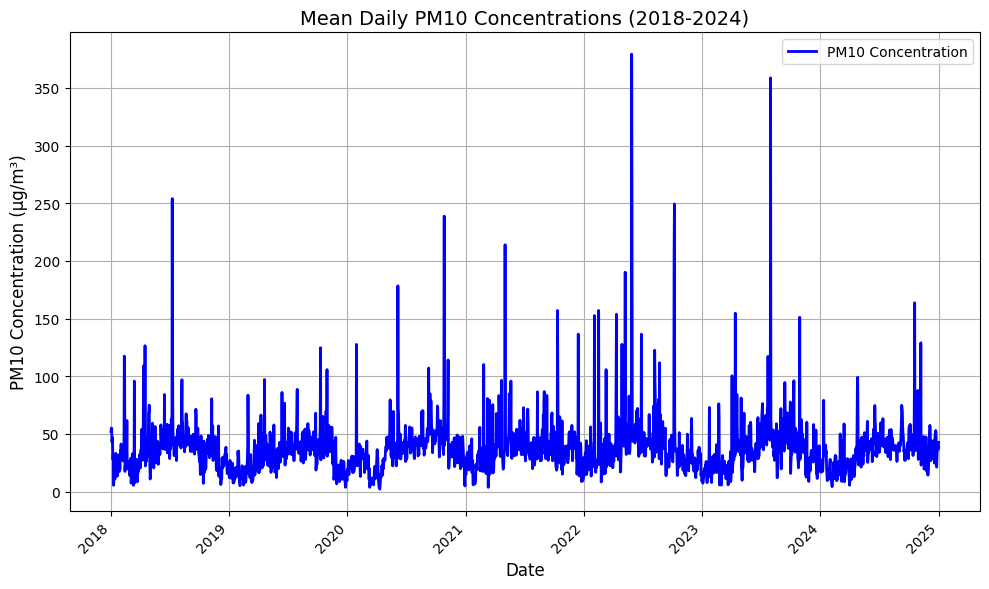

In [40]:
CombinedDf_grouped['Date'] = pd.to_datetime(CombinedDf_grouped['Date'])

CombinedDf_grouped = CombinedDf_grouped.sort_values(by='Date')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(CombinedDf_grouped['Date'], CombinedDf_grouped['Daily Mean PM10 Concentration'], label='PM10 Concentration', color='blue', linewidth=2)

# Adding labels and title
plt.title('Mean Daily PM10 Concentrations (2018-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM10 Concentration (µg/m³)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\tle33\AppData\Local\Temp\ipykernel_19696\2723418657.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', len(CombinedDf_grouped['year'].unique()))


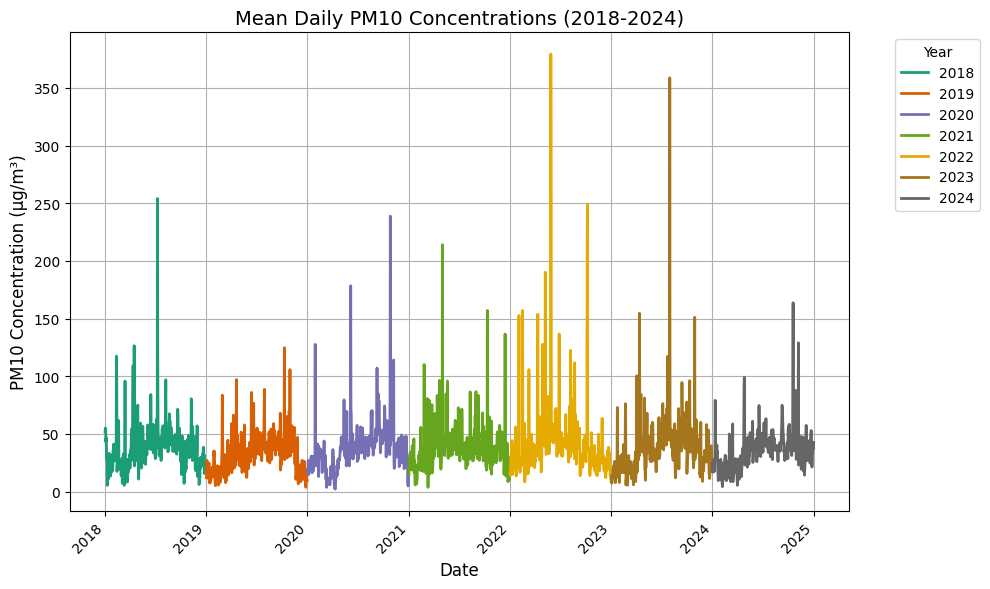

In [41]:
# Convert the Date column to Datetime
CombinedDf_grouped['Date'] = pd.to_datetime(CombinedDf_grouped['Date'])

# Sort the dataframe by the 'Date' column
CombinedDf_grouped = CombinedDf_grouped.sort_values(by='Date')

# Extract the year from the 'Date' column
CombinedDf_grouped['year'] = CombinedDf_grouped['Date'].dt.year

# Create a color map 
colors = plt.cm.get_cmap('Dark2', len(CombinedDf_grouped['year'].unique()))

# Plotting the data, with a different color for each year
plt.figure(figsize=(10, 6))

# Loop through each year and plot its data
for i, year in enumerate(sorted(CombinedDf_grouped['year'].unique())):
    year_data = CombinedDf_grouped[CombinedDf_grouped['year'] == year]
    plt.plot(year_data['Date'], year_data['Daily Mean PM10 Concentration'], label=str(year), color=colors(i), linewidth=2)

# Adding labels and title
plt.title('Mean Daily PM10 Concentrations (2018-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM10 Concentration (µg/m³)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(True)

# Adding a legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout() 
plt.show()

## Results

In [42]:
# Function to preprocess each DataFrame
def preprocess_pm10(df, year):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month-Day'] = df['Date'].dt.strftime('%m-%d')  # Ignore year
    df = df[~((df['Month-Day'] == '02-29') & (year == 2024))]  # Remove Feb 29 for 2024
    return df[['Month-Day', 'Daily Mean PM10 Concentration']].rename(columns={
        'Daily Mean PM10 Concentration': f'PM10_{year}'
    })

# Preprocess each year's dataset
pm10_2018 = preprocess_pm10(PM10_2018_data_grouped, 2018)
pm10_2024 = preprocess_pm10(PM10_2024_data_grouped, 2024)

# Merge on Month-Day
merged_pm10 = pd.merge(pm10_2018, pm10_2024, on='Month-Day', how='inner')

# Drop any missing values just in case
merged_pm10.dropna(inplace=True)

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(merged_pm10['PM10_2018'], merged_pm10['PM10_2024'])

# Results
print("Wilcoxon signed-rank test between 2018 and 2024 PM10 concentrations:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Wilcoxon signed-rank test between 2018 and 2024 PM10 concentrations:
Statistic: 32797.0000
P-value: 0.7659


In [43]:
# List of years
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
pm10_datasets = {
    2018: PM10_2018_data_grouped,
    2019: PM10_2019_data_grouped,
    2020: PM10_2020_data_grouped,
    2021: PM10_2021_data_grouped,
    2022: PM10_2022_data_grouped,
    2023: PM10_2023_data_grouped,
    2024: PM10_2024_data_grouped,
}

# Function to preprocess data
def preprocess_pm10(df, year):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month-Day'] = df['Date'].dt.strftime('%m-%d')  # Ignore year
    df = df[~((df['Month-Day'] == '02-29') & (year == 2024))]  # Remove Feb 29 for 2024
    return df[['Month-Day', 'Daily Mean PM10 Concentration']].rename(columns={
        'Daily Mean PM10 Concentration': f'PM10_{year}'
    })

# Preprocess all datasets
processed_pm10 = {year: preprocess_pm10(pm10_datasets[year], year) for year in years}

# Store results
wilcoxon_results = []

# Compare consecutive years
for i in range(len(years) - 1):
    year1, year2 = years[i], years[i + 1]
    
    # Merge data on Month-Day
    merged_pm10 = pd.merge(processed_pm10[year1], processed_pm10[year2], on='Month-Day', how='inner')
    merged_pm10.dropna(inplace=True)  # Drop missing values if any
    
    # Wilcoxon signed-rank test
    stat, p_value = wilcoxon(merged_pm10[f'PM10_{year1}'], merged_pm10[f'PM10_{year2}'])
    
    # Find median difference
    median_diff = (merged_pm10[f'PM10_{year2}'] - merged_pm10[f'PM10_{year1}']).median()
    
    # Find percentage change
    median_year1 = merged_pm10[f'PM10_{year1}'].median()
    percent_change = (median_diff / median_year1) * 100 if median_year1 != 0 else 0
    
    # Determine significance
    significance = "Significant Change" if p_value < 0.05 else "No Significant Change"
    
    # Store results
    wilcoxon_results.append([f"{year1} vs {year2}", stat, p_value, median_diff, percent_change, significance])

# Convert results to a DataFrame
results_df = pd.DataFrame(wilcoxon_results, columns=["Year Comparison", "Statistic", "P-value", "Median Difference (µg/m³)", "Percentage Change (%)", "Conclusion"])

# Print summary table
print(results_df)


  Year Comparison  Statistic       P-value  Median Difference (µg/m³)  \
0    2018 vs 2019    24297.0  6.435715e-06                  -4.333333   
1    2019 vs 2020    22846.5  1.689365e-07                   5.000000   
2    2020 vs 2021    31981.5  5.392007e-01                  -0.714286   
3    2021 vs 2022    32213.5  6.181069e-01                   0.946429   
4    2022 vs 2023    27914.5  1.051395e-02                  -2.650000   
5    2023 vs 2024    32359.0  6.066696e-01                   0.660714   

   Percentage Change (%)             Conclusion  
0             -12.206573     Significant Change  
1              15.555556     Significant Change  
2              -1.908397  No Significant Change  
3               2.704082  No Significant Change  
4              -7.500000     Significant Change  
5               1.943277  No Significant Change  


### PM2.5 Concentrations

In [44]:
PM2_5_2018 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2018.csv")
PM2_5_2019 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2019.csv")
PM2_5_2020 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2020.csv")
PM2_5_2021 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2021.csv")
PM2_5_2022 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2022.csv")
PM2_5_2023 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2023.csv")
PM2_5_2024 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/PM2.5/PM2.5_2024.csv")

#### 2018

In [45]:
PM2_5_2018_data = PM2_5_2018[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2018_data

,Date,Daily Mean PM2.5 Concentration
0,04/01/2018,5.1
1,04/02/2018,5.6
2,04/03/2018,6.5
3,04/04/2018,5.3
4,04/05/2018,6.4
...,...,...
3861,12/27/2018,3.2
3862,12/28/2018,-0.7
3863,12/29/2018,1.5
3864,12/30/2018,6.9


In [46]:
PM2_5_2018_data_grouped = PM2_5_2018_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [47]:
Concentration_2018 = PM2_5_2018_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2018_data_grouped['Date'])

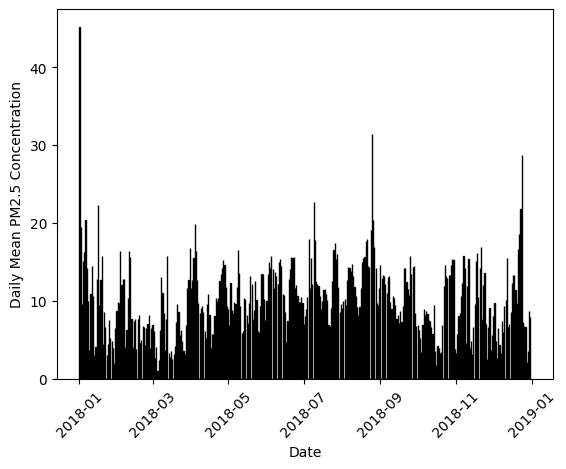

In [48]:
plt.hist(Date, weights=Concentration_2018, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2019

In [49]:
PM2_5_2019_data = PM2_5_2019[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2019_data

,Date,Daily Mean PM2.5 Concentration
0,01/01/2019,3.7
1,01/02/2019,2.7
2,01/03/2019,3.7
3,01/04/2019,3.3
4,01/05/2019,4.7
...,...,...
4663,12/27/2019,1.9
4664,12/28/2019,6.1
4665,12/29/2019,7.2
4666,12/30/2019,1.3


In [50]:
PM2_5_2019_data_grouped = PM2_5_2019_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [51]:
Concentration_2019 = PM2_5_2019_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2019_data_grouped['Date'])

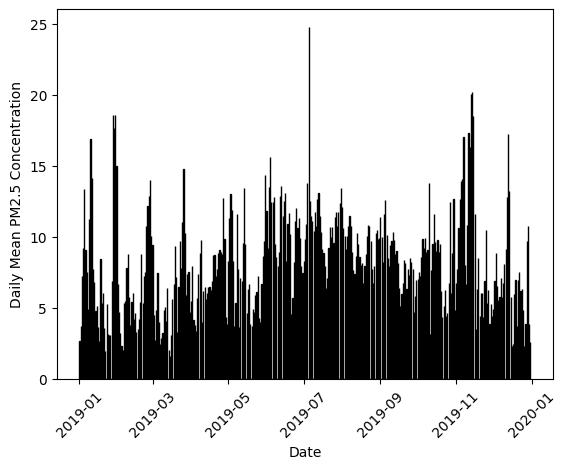

In [52]:
plt.hist(Date, weights=Concentration_2019, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2020

In [53]:
PM2_5_2020_data = PM2_5_2020[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2020_data

,Date,Daily Mean PM2.5 Concentration
0,01/01/2020,8.8
1,01/02/2020,6.0
2,01/03/2020,4.1
3,01/04/2020,4.0
4,01/05/2020,5.7
...,...,...
5113,12/27/2020,6.5
5114,12/28/2020,0.3
5115,12/29/2020,0.9
5116,12/30/2020,1.4


In [54]:
PM2_5_2020_data_grouped = PM2_5_2020_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [55]:
Concentration_2020 = PM2_5_2020_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2020_data_grouped['Date'])

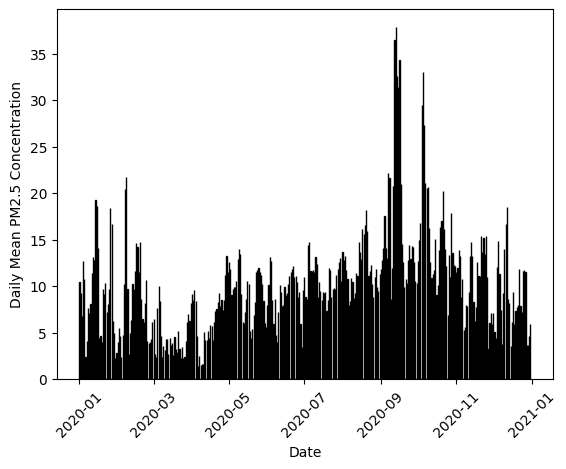

In [56]:
plt.hist(Date, weights=Concentration_2020, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2021

In [57]:
PM2_5_2021_data = PM2_5_2021[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2021_data

,Date,Daily Mean PM2.5 Concentration
0,01/01/2021,6.8
1,01/02/2021,5.7
2,01/03/2021,6.9
3,01/04/2021,7.4
4,01/05/2021,8.6
...,...,...
5042,12/27/2021,2.0
5043,12/28/2021,1.6
5044,12/29/2021,0.7
5045,12/30/2021,1.1


In [58]:
PM2_5_2021_data_grouped = PM2_5_2021_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [59]:
Concentration_2021 = PM2_5_2021_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2021_data_grouped['Date'])

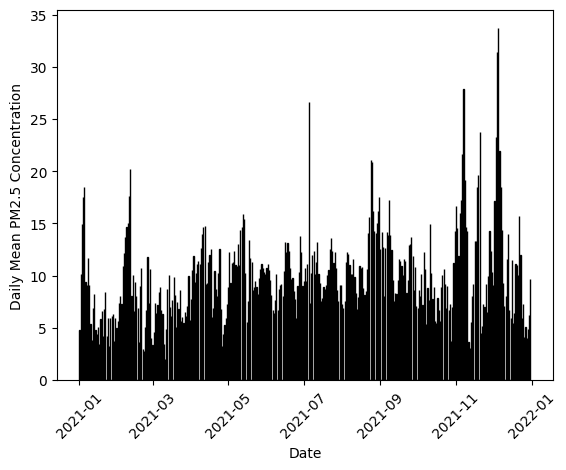

In [60]:
plt.hist(Date, weights=Concentration_2021, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2022

In [61]:
PM2_5_2022_data = PM2_5_2022[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2022_data

,Date,Daily Mean PM2.5 Concentration
0,01/01/2022,6.9
1,01/02/2022,4.8
2,01/03/2022,5.5
3,01/04/2022,6.6
4,01/05/2022,7.9
...,...,...
4542,12/27/2022,7.8
4543,12/28/2022,5.7
4544,12/29/2022,6.3
4545,12/30/2022,2.6


In [62]:
PM2_5_2022_data_grouped = PM2_5_2022_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [63]:
Concentration_2022 = PM2_5_2022_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2022_data_grouped['Date'])

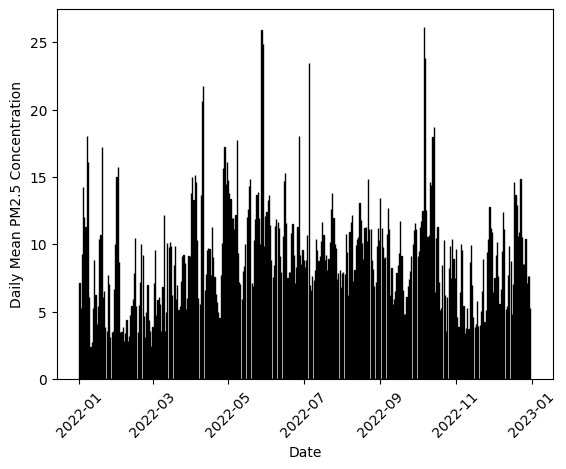

In [64]:
plt.hist(Date, weights=Concentration_2022, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2023

In [65]:
PM2_5_2023_data = PM2_5_2023[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2023_data

,Date,Daily Mean PM2.5 Concentration
0,01/01/2023,7.8
1,01/02/2023,8.5
2,01/03/2023,3.5
3,01/04/2023,3.5
4,01/05/2023,5.8
...,...,...
4166,12/27/2023,14.2
4167,12/28/2023,19.7
4168,12/29/2023,8.7
4169,12/30/2023,8.2


In [66]:
PM2_5_2023_data_grouped = PM2_5_2023_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [67]:
Concentration_2023 = PM2_5_2023_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2023_data_grouped['Date'])

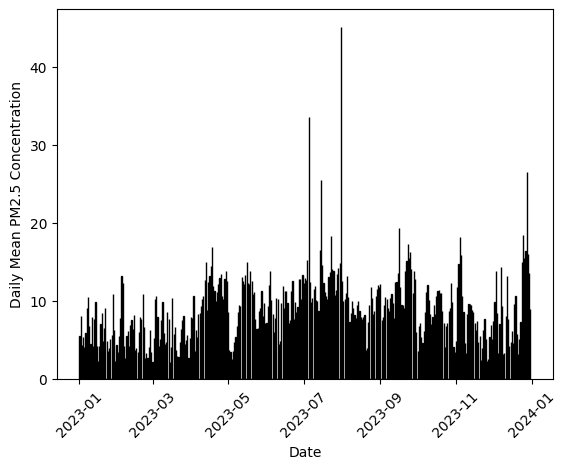

In [68]:
plt.hist(Date, weights=Concentration_2023, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

#### 2024

In [69]:
PM2_5_2024_data = PM2_5_2024[['Date', 'Daily Mean PM2.5 Concentration']]
PM2_5_2024_data

,Date,Daily Mean PM2.5 Concentration
0,09/11/2024,7.1
1,09/12/2024,7.8
2,09/13/2024,8.5
3,09/14/2024,7.9
4,09/15/2024,7.4
...,...,...
3788,12/27/2024,11.0
3789,12/28/2024,15.9
3790,12/29/2024,22.6
3791,12/30/2024,19.6


In [70]:
PM2_5_2024_data_grouped = PM2_5_2024_data.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [71]:
Concentration_2024 = PM2_5_2024_data_grouped['Daily Mean PM2.5 Concentration']
Date = pd.to_datetime(PM2_5_2024_data_grouped['Date'])

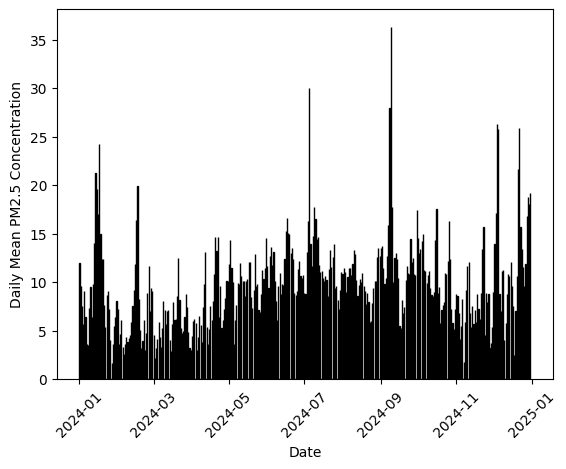

In [72]:
plt.hist(Date, weights=Concentration_2024, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Mean PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

### Summary

In [73]:
CombinedDf = pd.concat([PM2_5_2018_data,PM2_5_2019_data,PM2_5_2020_data,PM2_5_2021_data,PM2_5_2022_data,PM2_5_2023_data,PM2_5_2024_data])

In [74]:
CombinedDf_grouped = CombinedDf.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [75]:
CombinedDf_grouped = CombinedDf_grouped.sort_values(by='Date')

C:\Users\tle33\AppData\Local\Temp\ipykernel_19696\3327213291.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Dark2', len(CombinedDf_grouped['year'].unique()))


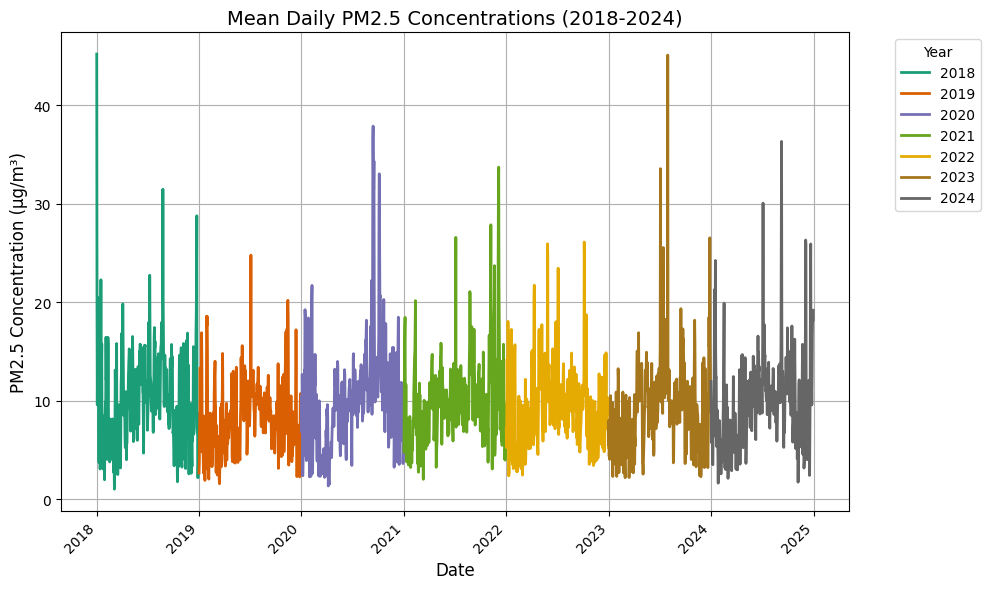

In [76]:
# Convert the Date column to Datetime
CombinedDf_grouped['Date'] = pd.to_datetime(CombinedDf_grouped['Date'])

# Sort the dataframe by the 'Date' column
CombinedDf_grouped = CombinedDf_grouped.sort_values(by='Date')

# Extract the year from the 'Date' column
CombinedDf_grouped['year'] = CombinedDf_grouped['Date'].dt.year

# Create a color map 
colors = plt.cm.get_cmap('Dark2', len(CombinedDf_grouped['year'].unique()))

# Plotting the data, with a different color for each year
plt.figure(figsize=(10, 6)) 

# Loop through each year and plot its data
for i, year in enumerate(sorted(CombinedDf_grouped['year'].unique())):
    year_data = CombinedDf_grouped[CombinedDf_grouped['year'] == year]
    plt.plot(year_data['Date'], year_data['Daily Mean PM2.5 Concentration'], label=str(year), color=colors(i), linewidth=2)

# Adding labels and title
plt.title('Mean Daily PM2.5 Concentrations (2018-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.grid(True)

# Adding a legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
# Function to preprocess each DataFrame
def preprocess_pm2_5(df, year):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month-Day'] = df['Date'].dt.strftime('%m-%d')  # Ignore year
    df = df[~((df['Month-Day'] == '02-29') & (year == 2024))]  # Remove Feb 29 for 2024
    return df[['Month-Day', 'Daily Mean PM2.5 Concentration']].rename(columns={
        'Daily Mean PM2.5 Concentration': f'PM2.5_{year}'
    })

# Preprocess each year's dataset
pm2_5_2018 = preprocess_pm2_5(PM2_5_2018_data_grouped, 2018)
pm2_5_2024 = preprocess_pm2_5(PM2_5_2024_data_grouped, 2024)

# Merge on Month-Day
merged_pm2_5 = pd.merge(pm2_5_2018, pm2_5_2024, on='Month-Day', how='inner')

# Drop any missing values just in case
merged_pm2_5.dropna(inplace=True)

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(merged_pm2_5['PM2.5_2018'], merged_pm2_5['PM2.5_2024'])

# Results
print("Wilcoxon signed-rank test between 2018 and 2024 PM2.5 concentrations:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Wilcoxon signed-rank test between 2018 and 2024 PM2.5 concentrations:
Statistic: 30080.0000
P-value: 0.1000


### Ozone Concentrations

### 2018

In [78]:
O3_2018 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2018.csv")
O3_2019 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2019.csv")
O3_2020 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2020.csv")
O3_2021 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2021.csv")
O3_2022 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2022.csv")
O3_2023 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2023.csv")
O3_2024 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/O3/O3_2024.csv")

In [79]:
O3_2018

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2018,AQS,60650009,1,0.046,ppm,43,Pechanga,17,100.0,...,Ozone,47,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
1,01/02/2018,AQS,60650009,1,0.040,ppm,37,Pechanga,17,100.0,...,Ozone,47,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
2,01/03/2018,AQS,60650009,1,0.017,ppm,16,Pechanga,17,100.0,...,Ozone,47,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
3,01/04/2018,AQS,60650009,1,0.043,ppm,40,Pechanga,17,100.0,...,Ozone,47,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
4,01/05/2018,AQS,60650009,1,0.034,ppm,31,Pechanga,17,100.0,...,Ozone,47,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,12/26/2018,AQS,60659003,1,0.035,ppm,32,Blythe-445 W Murphy Street,17,100.0,...,Ozone,87,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.612350,-114.602090
4748,12/27/2018,AQS,60659003,1,0.035,ppm,32,Blythe-445 W Murphy Street,17,100.0,...,Ozone,87,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.612350,-114.602090
4749,12/28/2018,AQS,60659003,1,0.039,ppm,36,Blythe-445 W Murphy Street,17,100.0,...,Ozone,87,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.612350,-114.602090
4750,12/29/2018,AQS,60659003,1,0.040,ppm,37,Blythe-445 W Murphy Street,17,100.0,...,Ozone,87,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.612350,-114.602090


In [80]:
O3_2018_data = O3_2018[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2018_data

,Date,Daily Max 8-hour Ozone Concentration
0,01/01/2018,0.046
1,01/02/2018,0.040
2,01/03/2018,0.017
3,01/04/2018,0.043
4,01/05/2018,0.034
...,...,...
4747,12/26/2018,0.035
4748,12/27/2018,0.035
4749,12/28/2018,0.039
4750,12/29/2018,0.040


In [81]:
O3_2018_data_grouped = O3_2018_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()

In [82]:
Concentration_2018 = O3_2018_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2018_data_grouped['Date'])

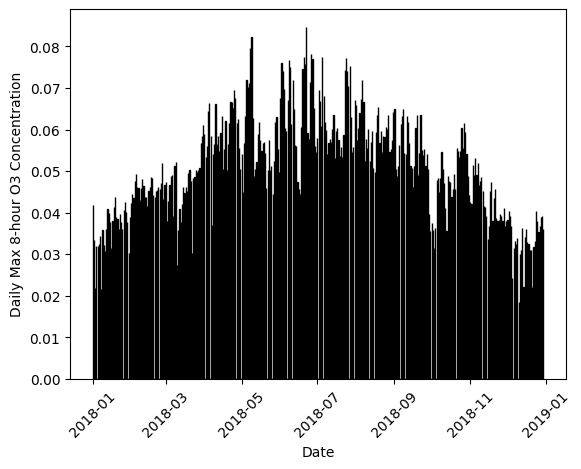

In [83]:
plt.hist(Date, weights=Concentration_2018, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2019

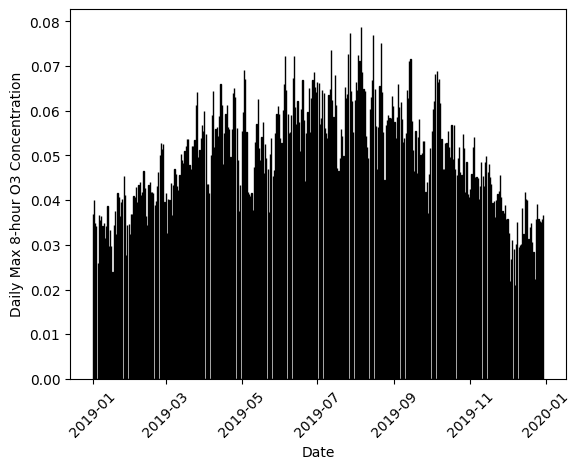

In [84]:
O3_2019_data = O3_2019[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2019_data
O3_2019_data_grouped = O3_2019_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2019 = O3_2019_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2019_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2019, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2020

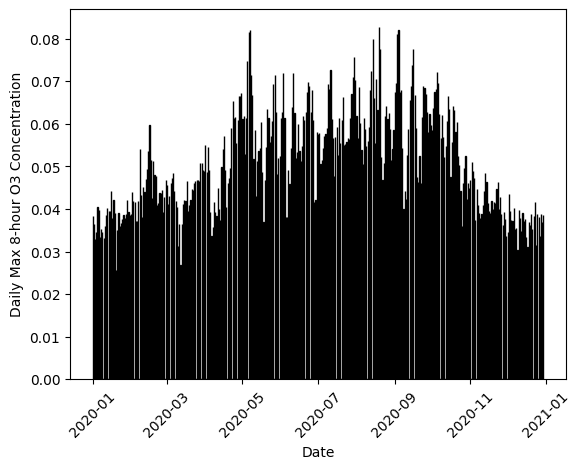

In [85]:
O3_2020_data = O3_2020[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2020_data
O3_2020_data_grouped = O3_2020_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2020 = O3_2020_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2020_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2020, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2021

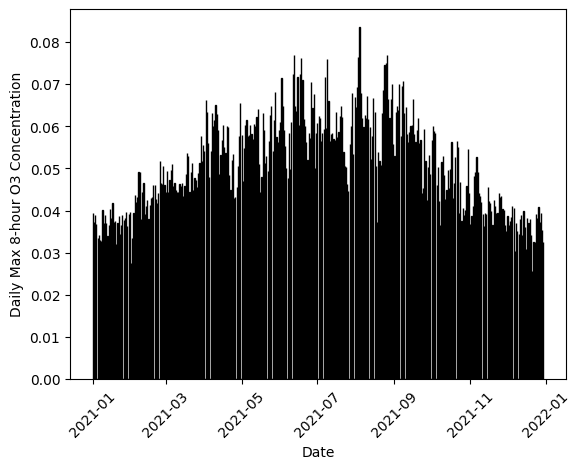

In [86]:
O3_2021_data = O3_2021[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2021_data
O3_2021_data_grouped = O3_2021_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2021 = O3_2021_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2021_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2021, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2022

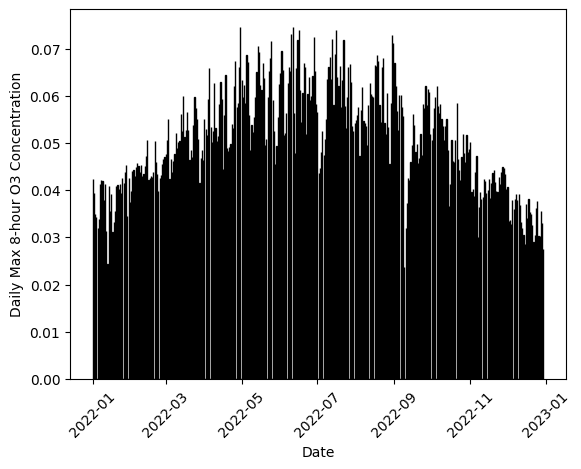

In [87]:
O3_2022_data = O3_2022[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2022_data
O3_2022_data_grouped = O3_2022_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2022 = O3_2022_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2022_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2022, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2023

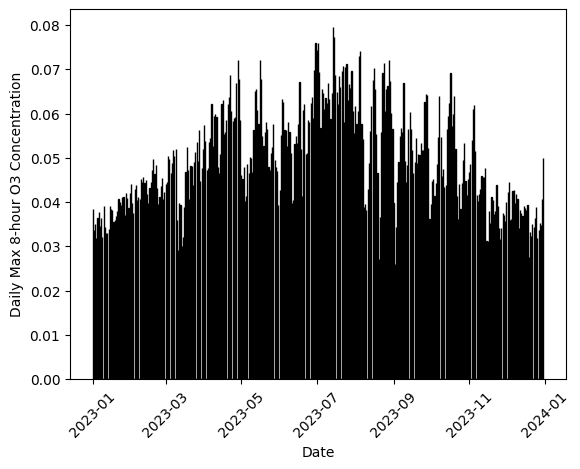

In [88]:
O3_2023_data = O3_2023[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2023_data
O3_2023_data_grouped = O3_2023_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2023 = O3_2023_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2023_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2023, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2024

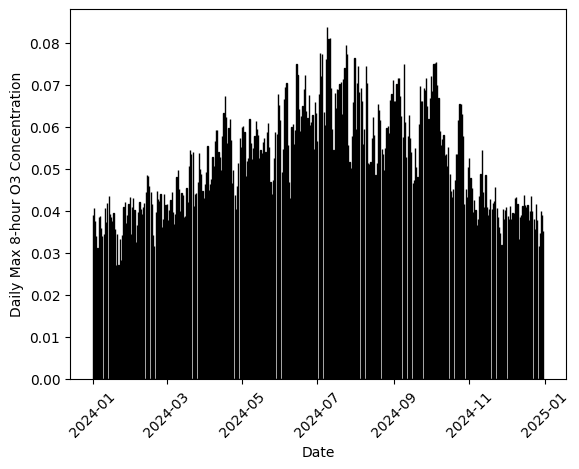

In [89]:
O3_2024_data = O3_2024[['Date', 'Daily Max 8-hour Ozone Concentration']]
O3_2024_data
O3_2024_data_grouped = O3_2024_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
Concentration_2024 = O3_2024_data_grouped['Daily Max 8-hour Ozone Concentration']
Date = pd.to_datetime(O3_2024_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2024, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 8-hour O3 Concentration')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Function to preprocess each DataFrame
def preprocess_o3(df, year):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month-Day'] = df['Date'].dt.strftime('%m-%d')  # Ignore year
    df = df[~((df['Month-Day'] == '02-29') & (year == 2024))]  # Remove Feb 29 for 2024
    return df[['Month-Day', 'Daily Max 8-hour Ozone Concentration']].rename(columns={
        'Daily Max 8-hour Ozone Concentration': f'O3_{year}'
    })

# Preprocess each year's dataset
O3_2018 = preprocess_o3(O3_2018_data_grouped, 2018)
O3_2024 = preprocess_o3(O3_2024_data_grouped, 2024)

# Merge on Month-Day instead of full date
merged_o3 = pd.merge(O3_2018, O3_2024, on='Month-Day', how='inner')

# Drop any missing values just in case
merged_o3.dropna(inplace=True)

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(merged_o3['O3_2018'], merged_o3['O3_2024'])

# Results
print("Wilcoxon signed-rank test between 2018 and 2024 O3 concentrations:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Wilcoxon signed-rank test between 2018 and 2024 O3 concentrations:
Statistic: 29612.5000
P-value: 0.0729


## NO2

In [92]:
NO2_2018 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2018.csv")
NO2_2019 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2019.csv")
NO2_2020 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2020.csv")
NO2_2021 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2021.csv")
NO2_2022 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2022.csv")
NO2_2023 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2023.csv")
NO2_2024 = pd.read_csv("C:/Users/tle33/OneDrive/Desktop/ENGR296/data/NO2/NO2_2024.csv")

In [93]:
NO2_2018

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2018,AQS,60650009,1,11.9,ppb,10,Pechanga,23,96.0,...,Nitrogen dioxide (NO2),99,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
1,01/02/2018,AQS,60650009,1,17.9,ppb,16,Pechanga,22,92.0,...,Nitrogen dioxide (NO2),99,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
2,01/04/2018,AQS,60650009,1,14.5,ppb,13,Pechanga,19,79.0,...,Nitrogen dioxide (NO2),99,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
3,01/05/2018,AQS,60650009,1,18.7,ppb,17,Pechanga,23,96.0,...,Nitrogen dioxide (NO2),99,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
4,01/06/2018,AQS,60650009,1,12.7,ppb,11,Pechanga,23,96.0,...,Nitrogen dioxide (NO2),99,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.447867,-117.088649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,12/27/2018,AQS,60659001,1,17.0,ppb,16,Lake Elsinore,24,100.0,...,Nitrogen dioxide (NO2),74,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.676490,-117.330980
2402,12/28/2018,AQS,60659001,1,7.5,ppb,7,Lake Elsinore,24,100.0,...,Nitrogen dioxide (NO2),74,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.676490,-117.330980
2403,12/29/2018,AQS,60659001,1,22.8,ppb,21,Lake Elsinore,24,100.0,...,Nitrogen dioxide (NO2),74,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.676490,-117.330980
2404,12/30/2018,AQS,60659001,1,20.1,ppb,19,Lake Elsinore,24,100.0,...,Nitrogen dioxide (NO2),74,40140,"Riverside-San Bernardino-Ontario, CA",6,California,65,Riverside,33.676490,-117.330980


### 2018

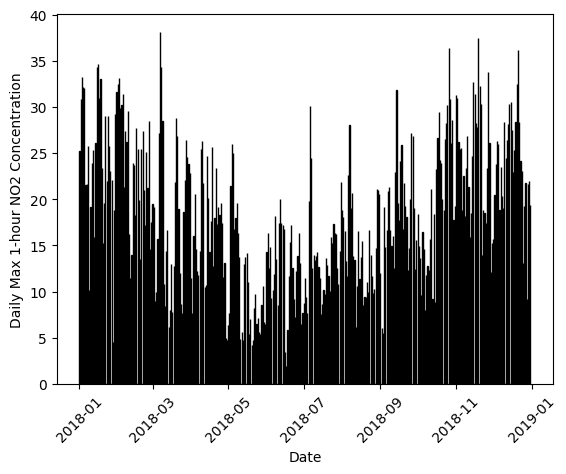

In [94]:
NO2_2018_data = NO2_2018[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2018_data
NO2_2018_data_grouped = NO2_2018_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2018 = NO2_2018_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2018_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2018, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2019

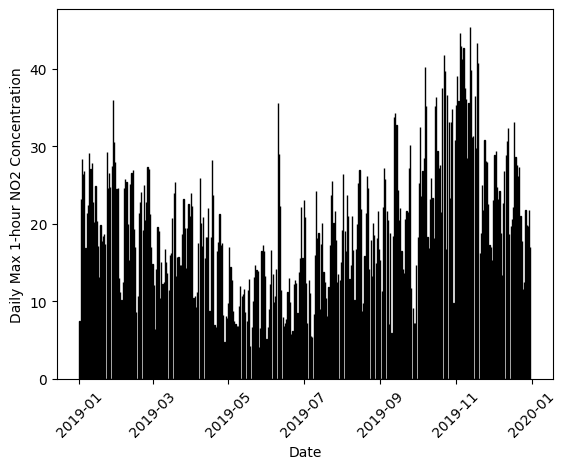

In [95]:
NO2_2019_data = NO2_2019[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2019_data
NO2_2019_data_grouped = NO2_2019_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2019 = NO2_2019_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2019_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2019, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2020

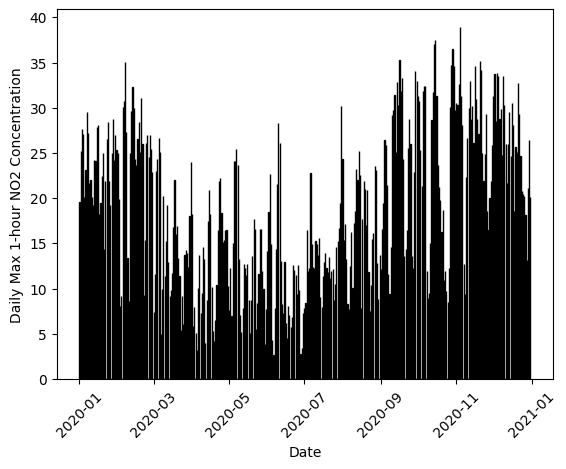

In [96]:
NO2_2020_data = NO2_2020[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2020_data
NO2_2020_data_grouped = NO2_2020_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2020 = NO2_2020_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2020_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2020, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2021

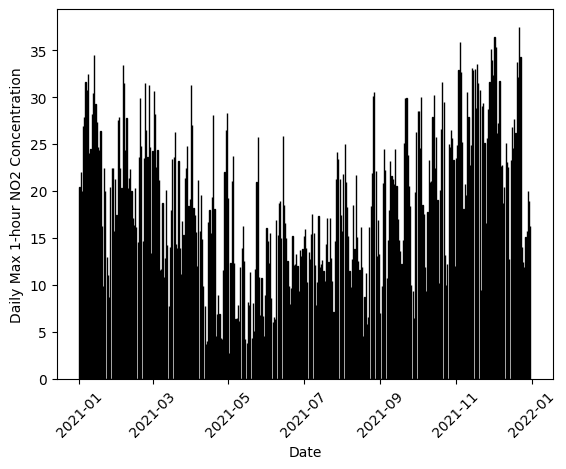

In [97]:
NO2_2021_data = NO2_2021[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2021_data
NO2_2021_data_grouped = NO2_2021_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2021 = NO2_2021_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2021_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2021, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2022

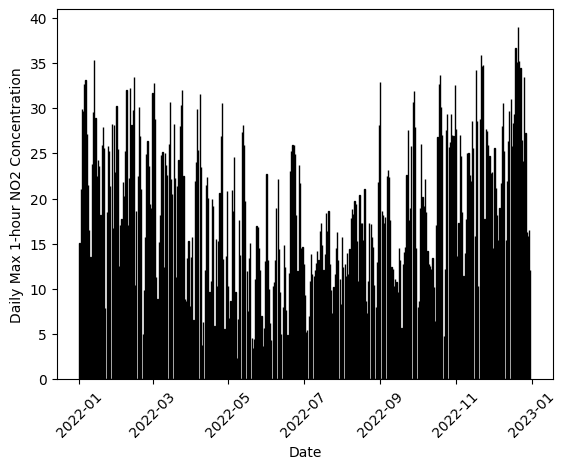

In [98]:
NO2_2022_data = NO2_2022[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2022_data
NO2_2022_data_grouped = NO2_2022_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2022 = NO2_2022_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2022_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2022, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2023

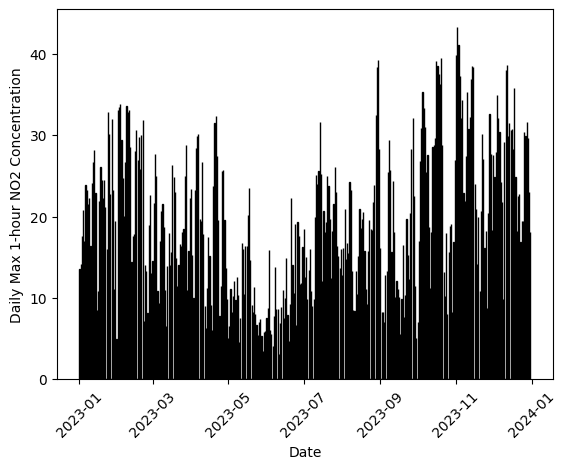

In [99]:
NO2_2023_data = NO2_2023[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2023_data
NO2_2023_data_grouped = NO2_2023_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2023 = NO2_2023_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2023_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2023, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

### 2024

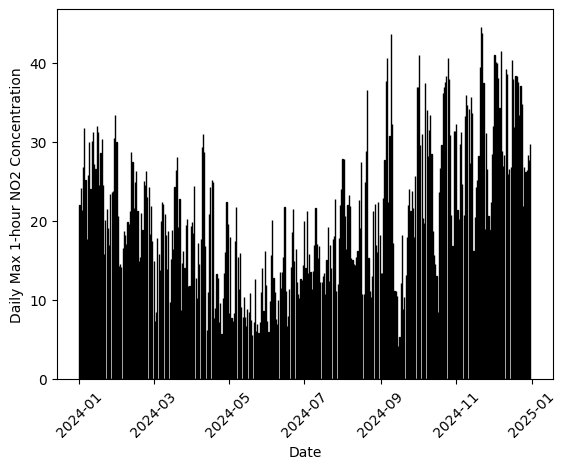

In [100]:
NO2_2024_data = NO2_2024[['Date', 'Daily Max 1-hour NO2 Concentration']]
NO2_2024_data
NO2_2024_data_grouped = NO2_2024_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
Concentration_2024 = NO2_2024_data_grouped['Daily Max 1-hour NO2 Concentration']
Date = pd.to_datetime(NO2_2024_data_grouped['Date'])
plt.hist(Date, weights=Concentration_2024, bins=2909, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Daily Max 1-hour NO2 Concentration')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Function to preprocess each DataFrame
def preprocess_NO2(df, year):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month-Day'] = df['Date'].dt.strftime('%m-%d')  # Ignore year
    df = df[~((df['Month-Day'] == '02-29') & (year == 2024))]  # Remove Feb 29 for 2024
    return df[['Month-Day', 'Daily Max 1-hour NO2 Concentration']].rename(columns={
        'Daily Max 1-hour NO2 Concentration': f'NO2_{year}'
    })

# Preprocess each year's dataset
NO2_2018 = preprocess_NO2(NO2_2018_data_grouped, 2018)
NO2_2024 = preprocess_NO2(NO2_2024_data_grouped, 2024)

# Merge on Month-Day
merged_NO2 = pd.merge(NO2_2018, NO2_2024, on='Month-Day', how='inner')

# Drop any missing values just in case
merged_NO2.dropna(inplace=True)

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(merged_NO2['NO2_2018'], merged_NO2['NO2_2024'])

# Results
print("Wilcoxon signed-rank test between 2018 and 2024 NO2 concentrations:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Wilcoxon signed-rank test between 2018 and 2024 NO2 concentrations:
Statistic: 23681.5000
P-value: 0.0000
